# dim = 2, wavelength 0.65nm

In [1]:
import sys
module_path = 'C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT'
sys.path.insert(1, module_path)
import Meta_SCMT
import numpy as np
import matplotlib.pyplot as plt

In [2]:
GP = {
    'dim' : 2, #dim : 1 or 2.
    'modes' : 1, #number of modes with in a single waveguide. modes <= 2 is usually good enough.
    'period' : 0.4,
    'res' : 20, #resolution within one period
    'downsample_ratio': 0.5, #between (0, 1] for the output periodic resolution, it will be int(round(downsample_ratio * res))
    'wh' : 0.8, #waveguide height
    'lam' : 0.65,
    'n_sub' : 1.46, #the refractive index of substrate.
    'n_wg' : 2.27,# the refractive index of waveguide
    'h_min' : 0.16, #h_min, and h_max define the range of the width of waveguide.
    'h_max' : 0.36,
    'dh' : 0.01, #the step size of h.
    'path' : "sim_cache_650nm/", #the inter state store path            
}
sim = Meta_SCMT.Sim(**GP)

C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT\Meta_SCMT\modes2D.py:24: UserWarning: Unlike gen modes 1D which is done locally. gen modes 2D is tricky. because we have to comunicate with tidy3d. Error can happen.            To debug, you have to get yourself familiar with tidy3d (the ideal of upload sim to cloud and download results after the sim is done.            Or, you can try to restart your jupyter notebook and running everythin from begining. The drawback is gen_modes() is usually slow and restart won't promise good results.
  warnings.warn("Unlike gen modes 1D which is done locally. gen modes 2D is tricky. because we have to comunicate with tidy3d. Error can happen.\


# gen library for PBA design

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:49<00:00,  2.35s/it]


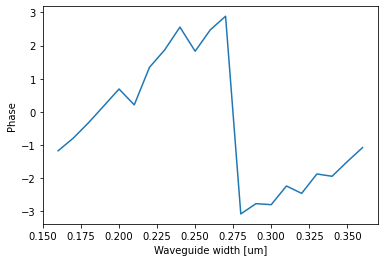

PBA width phase map saved.


In [6]:
sim.PBA.gen_lib(vis = True, backend = 'grcwa', step_size = 0.01)

In [4]:
#sim.PBA.gen_lib(vis = True, backend = 'tidy3d')

# From step 1 to step 3, you parpare the data and model you need to build a SCMT model. Once done, the cache data is stored in "sim_cache_1D" directory. When you need to run or build your model agian, you just load the data from cache.

# step1 generate modes

# it's ok to see warning like invalid value encountered in sqrt. This is because when using fsolve function, it can feed bad bata in function. This won't influence the final results.

Initializing simulation...
Mesh step (micron): [5.00e-02, 5.00e-02, 5.00e-02].
Simulation domain in number of grid points: [98, 98, 50].
Total number of computational grid points: 4.80e+05.
Total number of time steps: 1.
Estimated data size (GB) of monitor monitor: 0.0003.
Mode set, recommend verifying using viz_modes.


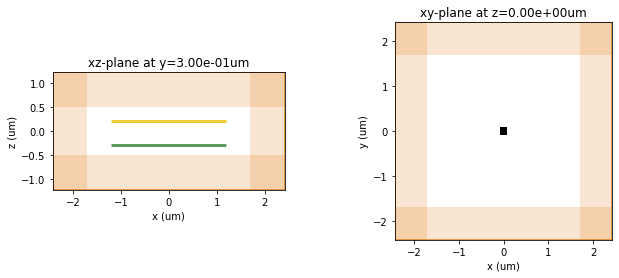

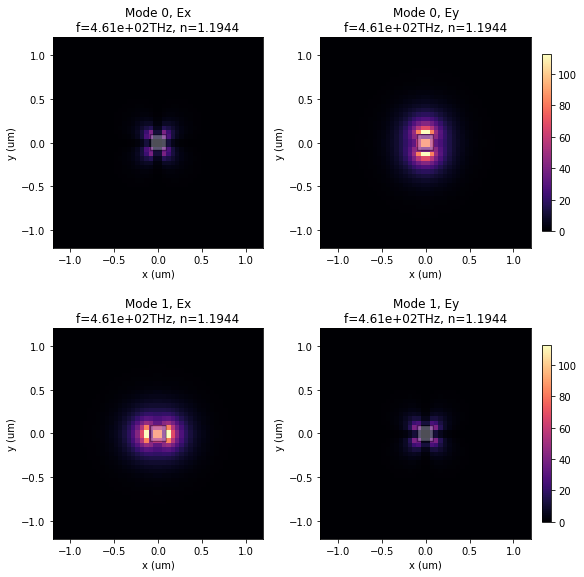

In [7]:
sim.gen_modes.local_preview(GP['h_min'])

In [8]:
base_dir = "modes2D_tidy3d_out/"
batch_path = "modes2D_saved_batch_index"
sim.gen_modes.upload(batch_path, base_dir)
sim.gen_modes.monitor()

Using Tidy3D credentials from stored file
Initializing simulation...
Mesh step (micron): [2.00e-02, 2.00e-02, 2.00e-02].
Simulation domain in number of grid points: [200, 200, 80].
Total number of computational grid points: 3.20e+06.
Total number of time steps: 2.
Estimated data size (GB) of monitor monitor: 0.0021.
Mode set, recommend verifying using viz_modes.
Initializing simulation...
Mesh step (micron): [2.00e-02, 2.00e-02, 2.00e-02].
Simulation domain in number of grid points: [200, 200, 80].
Total number of computational grid points: 3.20e+06.
Total number of time steps: 2.
Estimated data size (GB) of monitor monitor: 0.0021.
Mode set, recommend verifying using viz_modes.
Initializing simulation...
Mesh step (micron): [2.00e-02, 2.00e-02, 2.00e-02].
Simulation domain in number of grid points: [200, 200, 80].
Total number of computational grid points: 3.20e+06.
Total number of time steps: 2.
Estimated data size (GB) of monitor monitor: 0.0021.
Mode set, recommend verifying using 

Percentage of jobs completed: : 100%|██████████████████████████████████████████████████| 21/21 [04:03<00:00, 11.58s/it]


In [9]:
sim.gen_modes.gen(load = False)
sim.gen_modes.count_modes()

C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT\Meta_SCMT\modes2D.py:140: UserWarning: only load the results once you monitor that the simulation run on server is done.
  warnings.warn("only load the results once you monitor that the simulation run on server is done.")



loading results for job (1/21)

Loading monitor data into simulation.
Applying source normalization to all frequency monitors using source index 0.

loading results for job (2/21)

Loading monitor data into simulation.
Applying source normalization to all frequency monitors using source index 0.

loading results for job (3/21)

Loading monitor data into simulation.
Applying source normalization to all frequency monitors using source index 0.

loading results for job (4/21)

Loading monitor data into simulation.
Applying source normalization to all frequency monitors using source index 0.

loading results for job (5/21)

Loading monitor data into simulation.
Applying source normalization to all frequency monitors using source index 0.

loading results for job (6/21)

Loading monitor data into simulation.
Applying source normalization to all frequency monitors using source index 0.

loading results for job (7/21)

Loading monitor data into simulation.
Applying source normalization to al

21it [00:00, 1388.47it/s]

generated modes lib saved at:sim_cache_650nm/modes_lib.npy
total keys:  21
number of non zero modes:  [21.]


# step 1.1 check correctness of the generated modes.

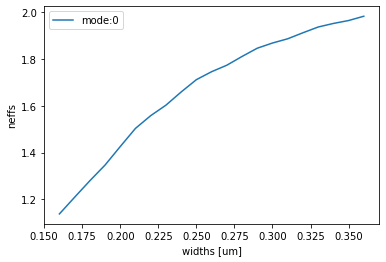

In [10]:
sim.gen_modes.vis_neffs()

# just show C

In [12]:
#sim.fftting_C.fit(load = False, vis=True, steps = 100, nodes = 64, layers = 4)

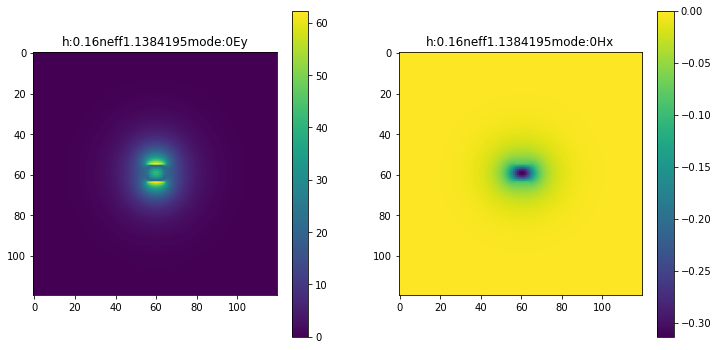

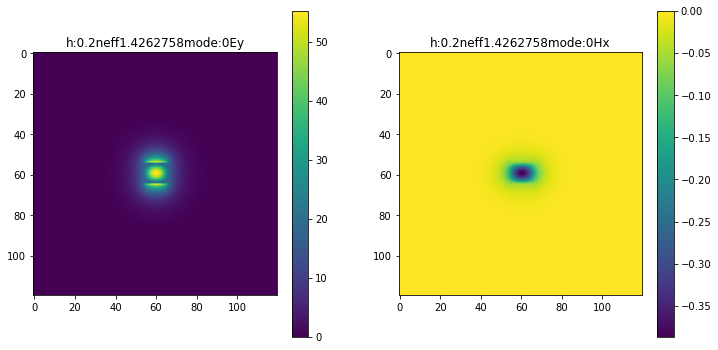

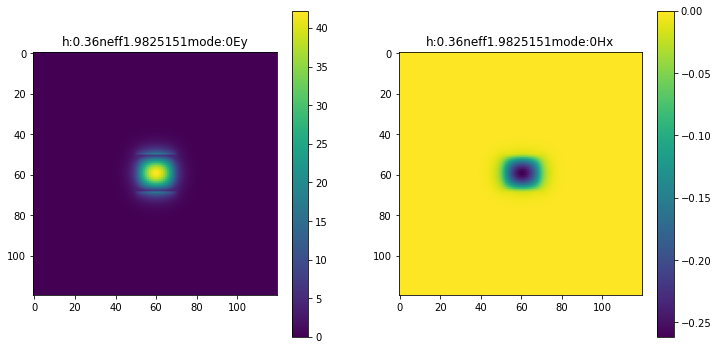

In [13]:
# randomly visualize some generated modes.
H = [0.16, 0.2, 0.36]
sim.gen_modes.vis_field(H)

# step 2, fit a function (the fully connected network) to output the effective refractive index given a width of waveguide. this function will be used in the SCMT model. (The solid line represent the original data, dashed line represent the function output).
# after the fitting the data will be saved in the "sim_cache..." directory. 

using device:  cuda
decay_rate: 0.79
total epoches:10000 [curr:    0 relative_error:100.013000%].
total epoches:10000 [curr: 1000 relative_error:0.613000%].
total epoches:10000 [curr: 2000 relative_error:0.301000%].
total epoches:10000 [curr: 3000 relative_error:0.259000%].
total epoches:10000 [curr: 4000 relative_error:0.239000%].
total epoches:10000 [curr: 5000 relative_error:0.236000%].
total epoches:10000 [curr: 6000 relative_error:0.223000%].
total epoches:10000 [curr: 7000 relative_error:0.236000%].
total epoches:10000 [curr: 8000 relative_error:0.235000%].
total epoches:10000 [curr: 9000 relative_error:0.171000%].
total epoches:10000 [curr: 9999 relative_error:0.162000%].
fitting error > 0.1%, increase total steps or number of layers in fullconnected network.(note: < 1% is good enough, but < 0.1% is the safest.)
model saved.


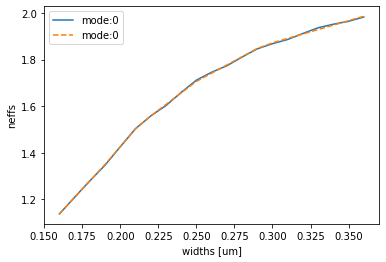

In [17]:
sim.fitting_neffs.fit(vis=True, layers = 4, nodes = 128)

# step 2.1 check the correctness of fitting.

In [18]:
neffs = sim.fitting_neffs.apply(H)
print(neffs)

[[1.1381515]
 [1.4264044]
 [1.985885 ]]


# step 3.1 fit a function that given the widths and the distance between two waveguides i and j, output the coupling efficient Cij for the combination of all modes. 
# Eg: fit_c(hi, hj, dis) -> [cij_00, cij_01, cij_10, cij_11] if you have two modes per waveguide.

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 56.07it/s]


C dataset generated. dataset size: 6174
C dataset saved.
using device:  cuda
decay_rate: 0.79
total epoches:10000 [curr:    0 relative_error:77.843000%].
total epoches:10000 [curr: 1000 relative_error:0.888000%].
total epoches:10000 [curr: 2000 relative_error:0.594000%].
total epoches:10000 [curr: 3000 relative_error:1.032000%].
total epoches:10000 [curr: 4000 relative_error:1.666000%].
total epoches:10000 [curr: 5000 relative_error:0.217000%].
total epoches:10000 [curr: 6000 relative_error:0.240000%].
total epoches:10000 [curr: 7000 relative_error:0.282000%].
total epoches:10000 [curr: 8000 relative_error:0.521000%].
total epoches:10000 [curr: 9000 relative_error:0.122000%].
total epoches:10000 [curr: 9999 relative_error:0.211000%].
fitting error > 0.1%, increase total steps or number of layers in fullconnected network.(note: < 1% is good enough, but < 0.1% is the safest.)
model saved.


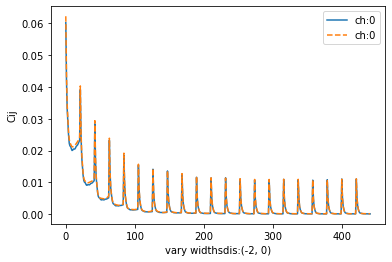

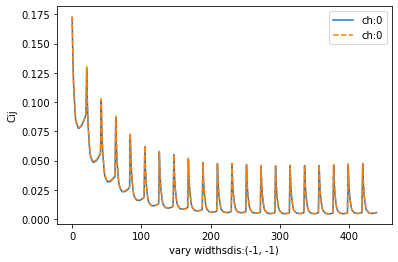

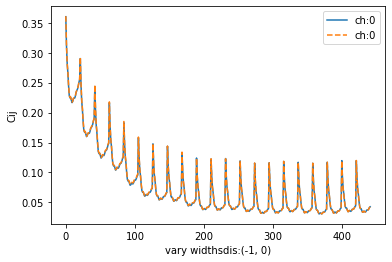

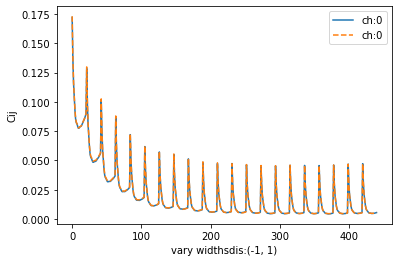

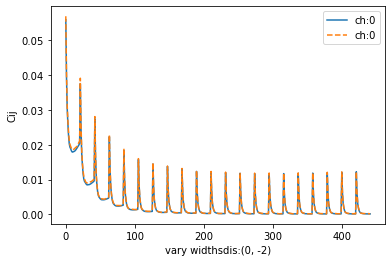

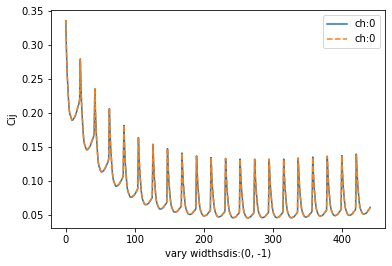

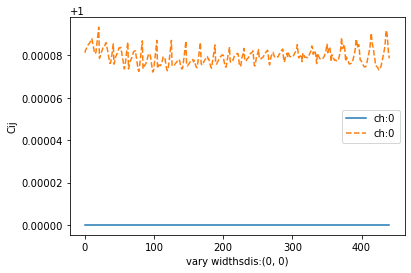

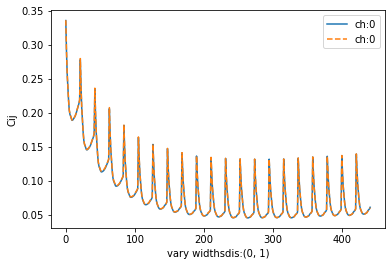

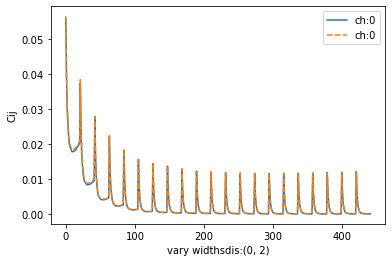

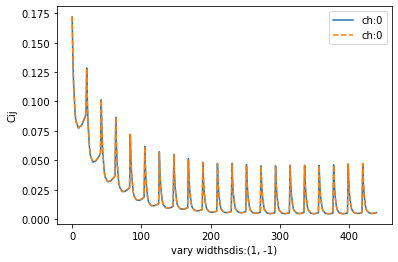

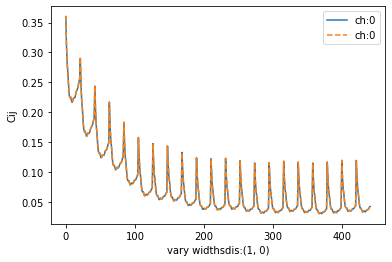

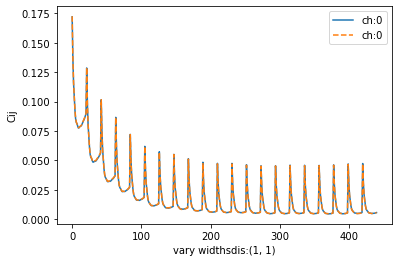

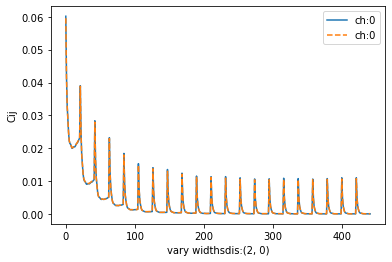

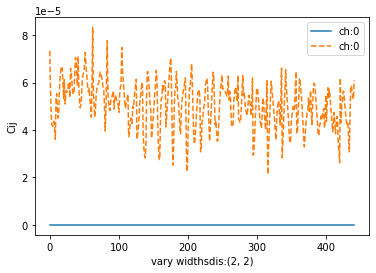

In [19]:
sim.fftting_C.fit(load = False, vis=True, steps = 10000, nodes = 128, layers = 6)

# the max(C_ij) indicate how strong your system's coupling is. the sweet point is below 0.5 but above 0.1, based on experience.

# step 3.2 fit a function that given the width of the waveguide, output the Ey field for each mode.

using device:  cuda
decay_rate: 0.79
total epoches:10000 [curr:    0 relative_error:103.600000%].
total epoches:10000 [curr: 1000 relative_error:29.774000%].
total epoches:10000 [curr: 2000 relative_error:6.165000%].
total epoches:10000 [curr: 3000 relative_error:4.825000%].
total epoches:10000 [curr: 4000 relative_error:3.701000%].
total epoches:10000 [curr: 5000 relative_error:3.080000%].
total epoches:10000 [curr: 6000 relative_error:2.459000%].
total epoches:10000 [curr: 7000 relative_error:1.984000%].
total epoches:10000 [curr: 8000 relative_error:1.743000%].
total epoches:10000 [curr: 9000 relative_error:1.581000%].
total epoches:10000 [curr: 9999 relative_error:1.346000%].
fitting error > 0.1%, increase total steps or number of layers in fullconnected network.(note: < 1% is good enough, but < 0.1% is the safest.)
model saved.


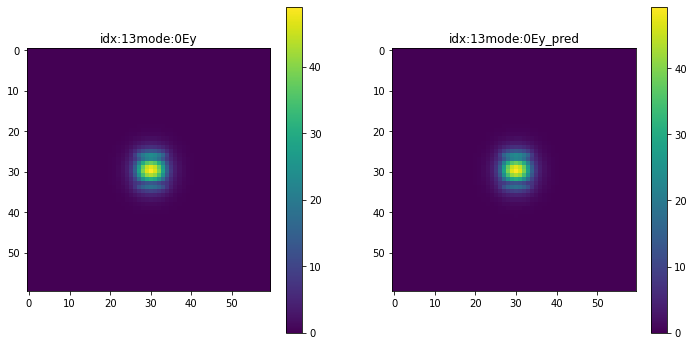

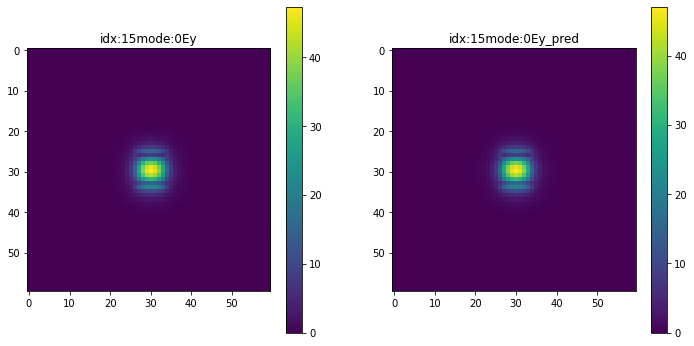

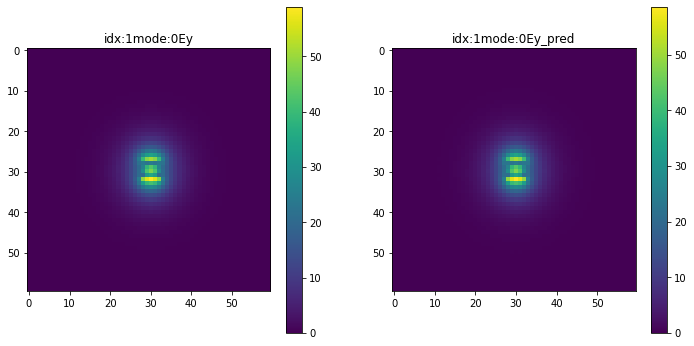

In [20]:
#randomly select 3 modes to visualize
sim.fftting_E.fit(vis=True, nodes = 128, layers = 6)

# step 3.3 fitting K, this is similiar to fit C

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:12<00:00,  1.64it/s]


K dataset generated. dataset size: 6174
K dataset saved.
using device:  cuda
decay_rate: 0.79
total epoches:30000 [curr:    0 relative_error:131.338000%].
total epoches:30000 [curr: 3000 relative_error:2.997000%].
total epoches:30000 [curr: 6000 relative_error:1.543000%].
total epoches:30000 [curr: 9000 relative_error:2.906000%].
total epoches:30000 [curr:12000 relative_error:0.721000%].
total epoches:30000 [curr:15000 relative_error:3.272000%].
total epoches:30000 [curr:18000 relative_error:0.435000%].
total epoches:30000 [curr:21000 relative_error:0.416000%].
total epoches:30000 [curr:24000 relative_error:0.385000%].
total epoches:30000 [curr:27000 relative_error:0.343000%].
total epoches:30000 [curr:29999 relative_error:0.565000%].
fitting error > 0.1%, increase total steps or number of layers in fullconnected network.(note: < 1% is good enough, but < 0.1% is the safest.)
model saved.


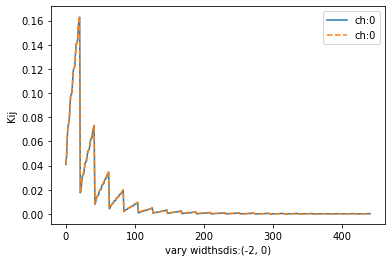

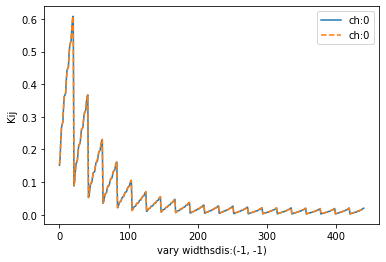

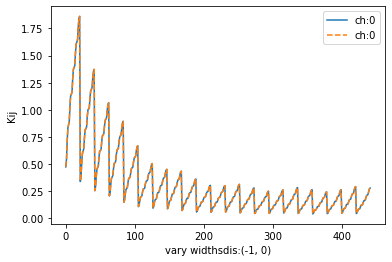

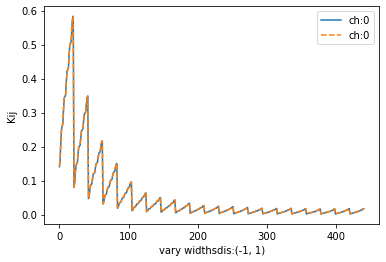

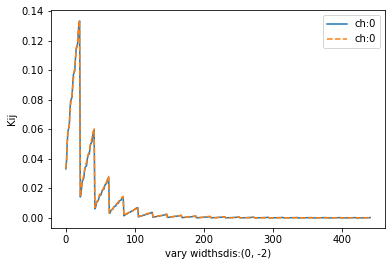

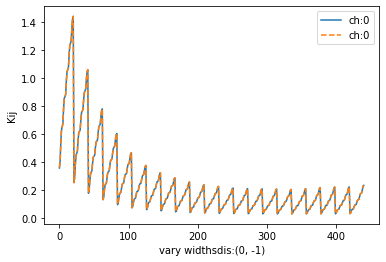

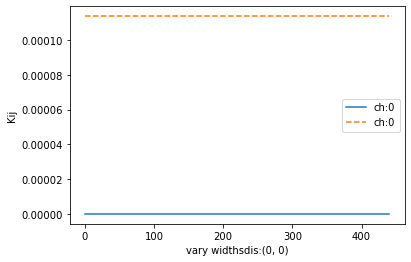

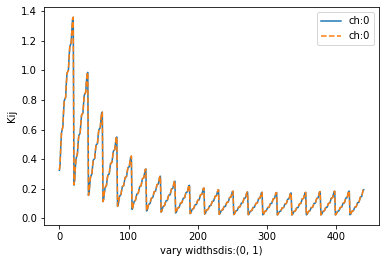

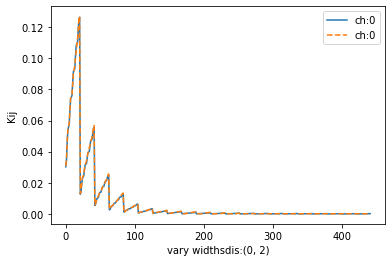

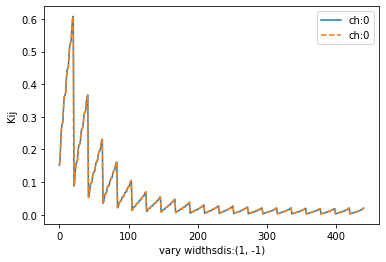

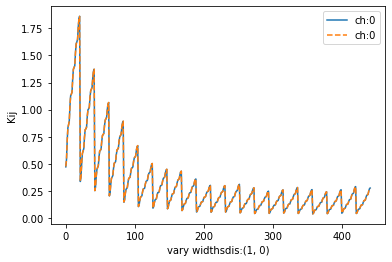

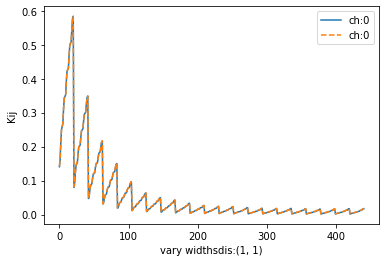

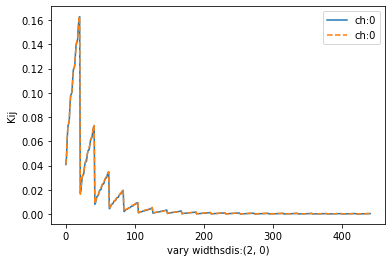

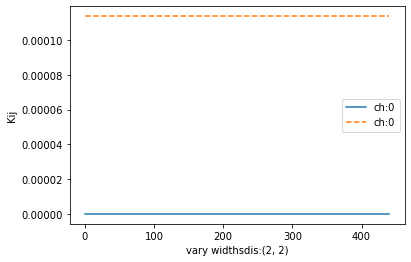

In [21]:
sim.fftting_K.fit(load = False, vis=True, nodes = 128,layers = 6, steps = 30000)

# step 4 run a forward simulation.

# if no coupling: quite different from the scmt case, which indicate the coupling is important in this case.

Optimizing by devs: ['cuda']
dis model input generated.
coo_sparse generated.
initialized by loaded h_paras.
Optimizing by devs: ['cuda']
dis model input generated.
coo_sparse generated.
initialized by loaded h_paras.


Text(0.5, 1.0, 'near field phase by scmt model')

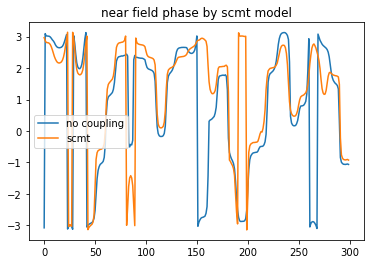

In [28]:
N = 30
#the widths of waveguides.
wgs = np.random.uniform(GP['h_min'], GP['h_max'], (N, N))
prop_dis = 0.25 * N * GP['period']
#near field. the field at the exit of the waveguides.
sim.scmt.init_model(N, prop_dis, APPROX = 1, COUPLING = False, init_hs= wgs, far_field= False)
E_no_coupling =sim.scmt.forward()
sim.scmt.init_model(N, prop_dis, APPROX = 1, COUPLING = True, init_hs= wgs, far_field= False)
E_scmt =sim.scmt.forward()
plt.figure()
plt.plot(np.angle(E_no_coupling[E_no_coupling.shape[0]//2]), label = 'no coupling')
plt.plot(np.angle(E_scmt[E_scmt.shape[0]//2]), label = 'scmt')
plt.legend()
plt.title("near field phase by scmt model")

# step 4.1 we do a fullwave simulation using Tidy3d to validate our forward process.

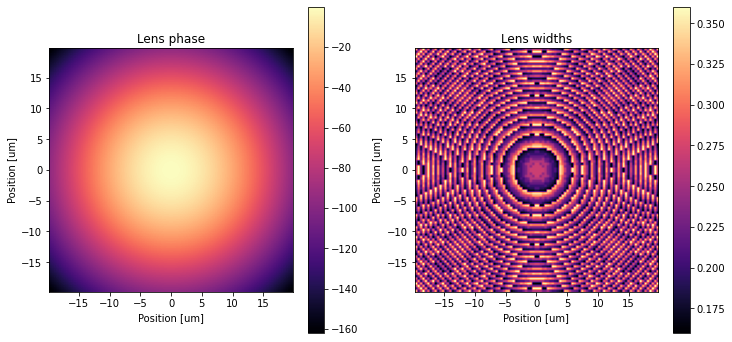

In [3]:
N = 100
theta = 0
NA = 0.8
prop_dis = 0.5 * N * GP['period'] * np.sqrt((1 - NA**2)/NA**2)
wgs = sim.PBA.design_lens(N, prop_dis, load = True)
np.save(f"PBA_lens_N{N}_lam{GP['lam']}um.npy", wgs)

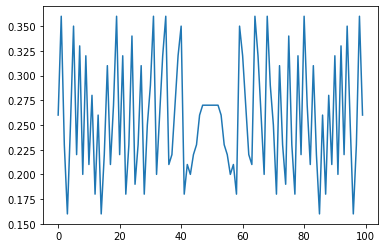

In [30]:
plt.plot(wgs[wgs.shape[0]//2])

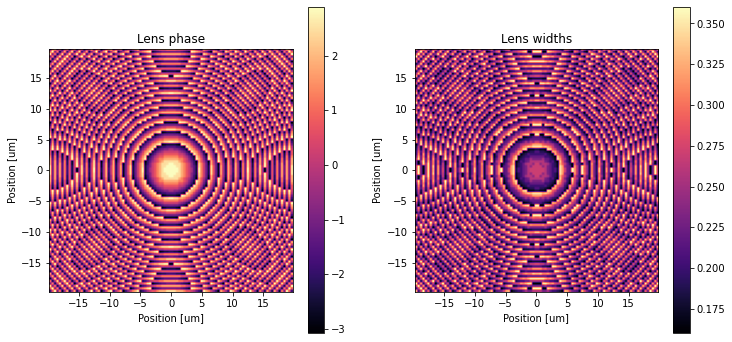

In [31]:
phases = sim.PBA.width_to_phase(wgs, sim.GP.period, load = True, vis = True)

Optimizing by devs: ['cuda']
dis model input generated.
coo_sparse generated.
initialized by loaded h_paras.


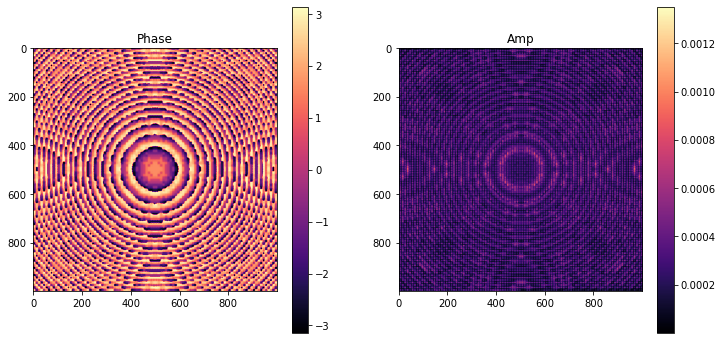

In [33]:
sim.scmt.init_model(N, prop_dis, APPROX = 1, COUPLING = True, init_hs= wgs, far_field= False)
E_out =sim.scmt.forward(theta = theta)
sim.scmt.vis_field(E_out)
E_scmt = E_out

Optimizing by devs: ['cuda']
dis model input generated.
coo_sparse generated.
f_kernel generated.
initialized by loaded h_paras.


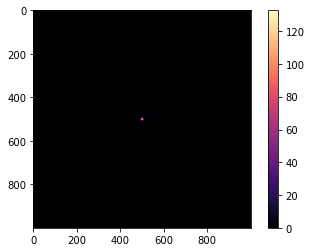

In [34]:
sim.scmt.init_model(N, prop_dis, APPROX = 1, COUPLING = True, init_hs= wgs, far_field= True)
E_out =sim.scmt.forward(theta = theta)
sim.scmt.vis_field(E_out)

# fullwave

C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT\Meta_SCMT\fullwave_2D.py:24: UserWarning: Fullwave is expensive and slow. You can set the prop_dis = 0, and use near_to_far to get the far field. Only do fullwave on small devices. And low resolution can be inaccurate.
  warnings.warn("Fullwave is expensive and slow. You can set the prop_dis = 0, and use near_to_far to get the far field. Only do fullwave on small devices. And low resolution can be inaccurate.")


Fullwave resolution: 30
numerical aperture: 0.81
total running time: 1.084083307293225e-12
Tidy3D PlaneWave:
name            = None
injection_axis  = +z
position        = -8.97
source_time     = GaussianPulse(
    frequency  = 4.61e+14,
    fwidth     = 4.61e+13,
    offset     = 5.00)
polarization    = y
amplitude       = 1.00e+00

Initializing simulation...
Mesh step (micron): [3.33e-02, 3.33e-02, 3.33e-02].
Simulation domain in number of grid points: [1230, 1230, 588].
Total number of computational grid points: 8.90e+08.
Total number of time steps: 18764.
Estimated data size (GB) of monitor axis: 0.0000.
Estimated data size (GB) of monitor focal_plane: 0.0001.
Estimated data size (GB) of monitor incident: 0.0691.
Estimated data size (GB) of monitor near_field: 0.0691.
Estimated data size (GB) of monitor focal_plane_1: 0.0691.
Estimated data size (GB) of monitor focus: 0.0002.
Estimated data size (GB) of monitor cross_section1: 0.0321.
Estimated data size (GB) of monitor reflection: 

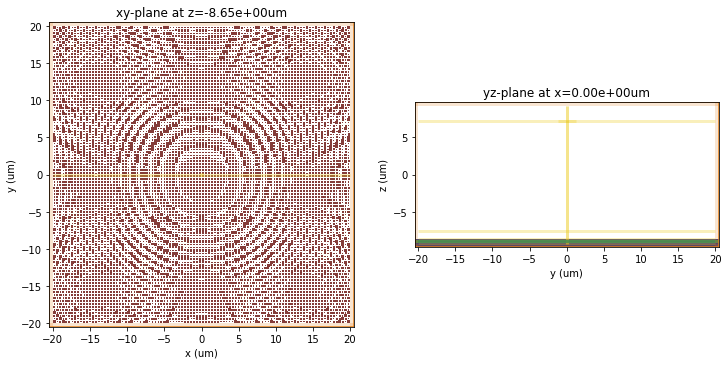

In [4]:
sim.fullwave.init_sim(prop_dis, N, wgs, res = 30, theta = theta)

In [37]:
# sim.fullwave.upload(task_name="May14_2D_lens_N" + str(N))
# sim.fullwave.download(data_path="output_tidy3d/")

Uploading the json file...
Project 'May14_2D_lens_N100' status: success...                                  

Simulation domain Nx, Ny, Nz: [1230, 1230, 588]
Applied symmetries: [0, 0, 0]
Number of computational grid points: 8.8959e+08.
Using subpixel averaging: True
Number of time steps: 18764
Automatic shutoff factor: 1.00e-05
Time step (s): 5.7775e-17

Compute source modes time (s):     1.3411
Compute monitor modes time (s):    1.3436


Starting solver...
- Time step    299 / time 1.73e-14s (  1 % done), field decay: 1.00e+00
- Time step    750 / time 4.33e-14s (  4 % done), field decay: 1.00e+00
- Time step   1501 / time 8.67e-14s (  8 % done), field decay: 6.95e-01
- Time step   2251 / time 1.30e-13s ( 12 % done), field decay: 9.62e-02
- Time step   3002 / time 1.73e-13s ( 16 % done), field decay: 1.39e-02
- Time step   3752 / time 2.17e-13s ( 20 % done), field decay: 1.75e-03
- Time step   4503 / time 2.60e-13s ( 24 % done), field decay: 5.48e-04
- Time step   5253 / time 3.03e-1

Applying source normalization to all frequency monitors using source index 0.


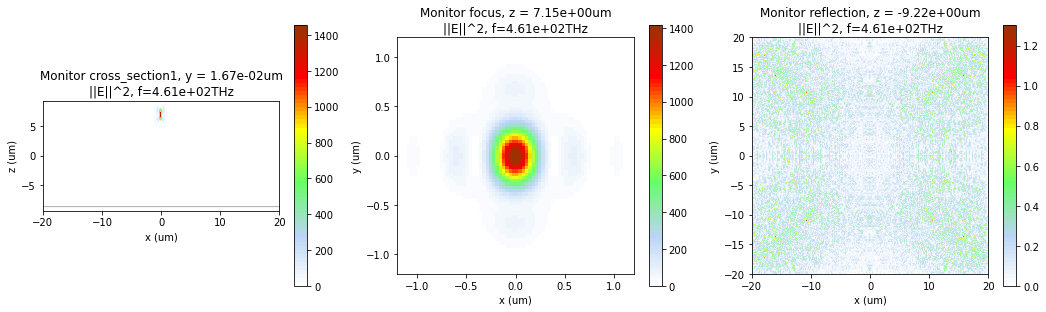

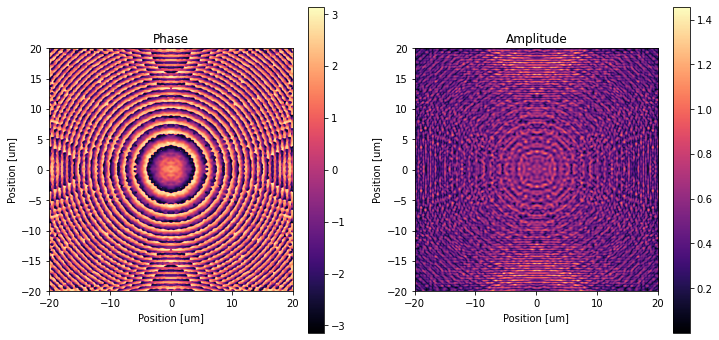

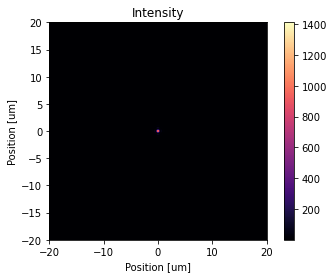

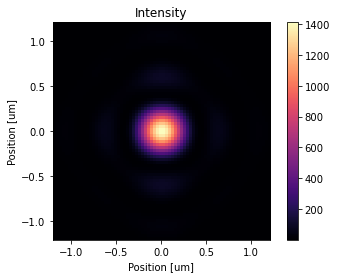

return field: Ey_near, Ey_near_FW, Ey_far, Ey_far_FW. Ey_near is downsampled Ey_near_FW, so that resolution is same with cmt model.


In [5]:
Ey_near, Ey_near_FW, Ey_far, Ey_far_FW = sim.fullwave.vis_monitor(path= "output_tidy3d/" + "May14_2D_lens_N" + str(N) + '/')

f_kernel generated.
Model initialized.
using device:  cuda
I_in: 4000000.000000, I_out: 24612932943872.000000, I_out/I_in: 6153233.235968.


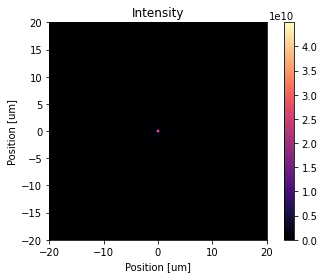

Ideal focal area power/total_far_field_power = 83.36%
fwhm_airy = 0.3333 um,  0.51 $\lambda$
fwhm = 0.4667 um,  0.72 $\lambda$


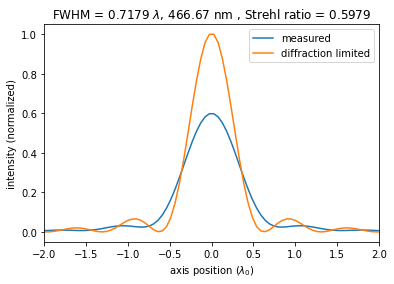

transmission efficiency = 63.59%
far field efficiency = 55.48%
focusing efficiency = 36.88%
focal area power/total_far_field_power = 66.47%


In [6]:
sim.fullwave.results_analysis()

In [47]:
def get_phase_offset(E1, E2):
    L2_dis = np.inf
    theta_opt = 0
    for theta in np.linspace(0, 2 * np.pi, 300):
        E_temp = E1 * np.exp(1j * theta)
        phase_temp = np.angle(E_temp)
        phase2 = np.angle(E2)
        dis_temp = ((phase_temp - phase2)**2).sum()
        if dis_temp < L2_dis:
            L2_dis = dis_temp
            theta_opt = theta
    print("minimum phase l2 dis:", L2_dis)
    return theta_opt

In [56]:
def cal_l2(E1, E2):
    ph1_offset = get_phase_offset(E1, E2)
    plt.figure(figsize = (20, 10))
    plt.plot(np.angle(E1 * np.exp(1j * ph1_offset)))
    plt.plot(np.angle(E2))
    p_scmt = np.angle(E1 * np.exp(1j * ph1_offset))
    p_fw = np.angle(E2)
    return np.sqrt(np.sum((p_scmt - p_fw)**2))/np.sum(np.abs(p_fw))

minimum phase l2 dis: 2219.8045245840913
L2 scmt 0.030564803175705348


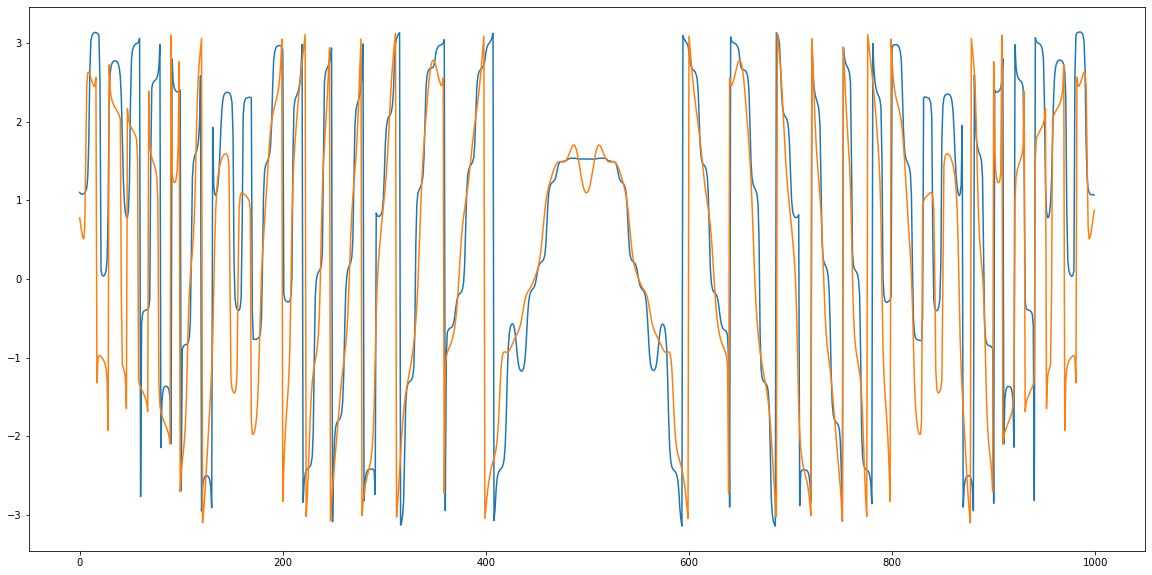

In [57]:
l2_tmp_scmt = cal_l2(E_scmt[E_scmt.shape[0]//2], Ey_near[1:,1:][E_scmt.shape[0]//2])
print("L2 scmt", l2_tmp_scmt)